In [1]:
# DATA SCIENCE SALARIES

# The questions we will try to answer:
# 1. Does remote work has an effect on salary in DS?
# 2. Does company size has an effect on salary in DS?

In [149]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
# Data loading and cleaning

df = pd.read_csv('ds_salaries.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df['salary_k'] = df['salary']/1000
df.drop(df[(df['salary_k'] > 200)].index, inplace=True)

In [151]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_100k
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,0.70
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,2.60
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,0.85
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,0.20
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,1.54
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,1.26
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,1.29
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,1.50


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           606 non-null    int64  
 1   experience_level    606 non-null    object 
 2   employment_type     606 non-null    object 
 3   job_title           606 non-null    object 
 4   salary              606 non-null    int64  
 5   salary_currency     606 non-null    object 
 6   salary_in_usd       606 non-null    int64  
 7   employee_residence  606 non-null    object 
 8   remote_ratio        606 non-null    int64  
 9   company_location    606 non-null    object 
 10  company_size        606 non-null    object 
 11  salary_100k         606 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 61.5+ KB


In [98]:
# How many different company sizes are in the DataFrame?

company_sizes= df.company_size.unique()
print(company_sizes)

['L' 'S' 'M']


In [99]:
# How many different remote ratios are in the DataFrame?

remote_ratios= df.remote_ratio.unique()
print(remote_ratios)

[  0  50 100]


In [100]:
df.isnull().values.any()

False

In [101]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_k
count,607.000000,6.070000e+02,607.000000,607.00000,607.000000
mean,2021.405272,3.240001e+05,112297.869852,70.92257,32.400006
std,0.692133,1.544357e+06,70957.259411,40.70913,154.435749
min,2020.000000,4.000000e+03,2859.000000,0.00000,0.400000
25%,2021.000000,7.000000e+04,62726.000000,50.00000,7.000000
50%,2022.000000,1.150000e+05,101570.000000,100.00000,11.500000
75%,2022.000000,1.650000e+05,150000.000000,100.00000,16.500000
max,2022.000000,3.040000e+07,600000.000000,100.00000,3040.000000


In [102]:
df.describe(include=['O'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [ ]:
# DATA VISUALIZATION

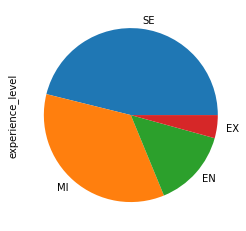

In [233]:
df['experience_level'].value_counts().plot(kind="pie")
plt.show()

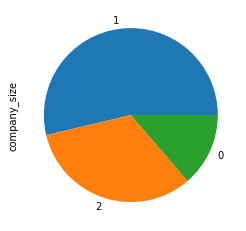

In [234]:
df['company_size'].value_counts().plot(kind="pie")
plt.show()

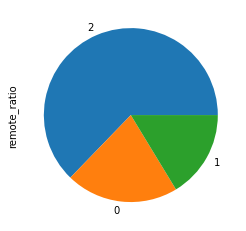

In [235]:
df['remote_ratio'].value_counts().plot(kind="pie")
plt.show()

In [77]:
df2 = df.groupby(df.remote_ratio).mean()
df2

,work_year,salary,salary_in_usd,salary_k
remote_ratio,,,,
0,2021.496063,218147.842520,106354.622047,218.147843
50,2020.909091,708018.171717,80823.030303,708.018172
100,2021.503937,259499.902887,122457.454068,259.499903


<AxesSubplot:xlabel='company_size'>

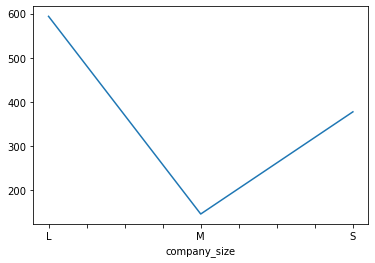

In [56]:
df['salary_k'].groupby(df.company_size).mean().plot(typ)

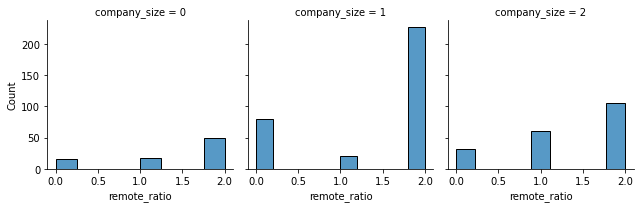

In [236]:
g = sns.FacetGrid(df, col="company_size")
g.map_dataframe(sns.histplot, "remote_ratio")

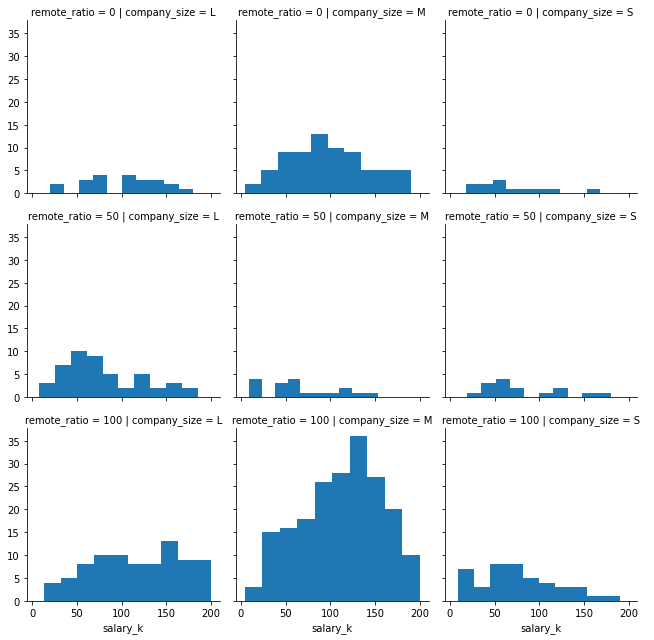

In [172]:
grid = sns.FacetGrid(df, col='company_size', row='remote_ratio')
grid.map(plt.hist, 'salary_k')
grid.add_legend();
g.savefig('Salaries histograms per remote ratio adn company size.png')

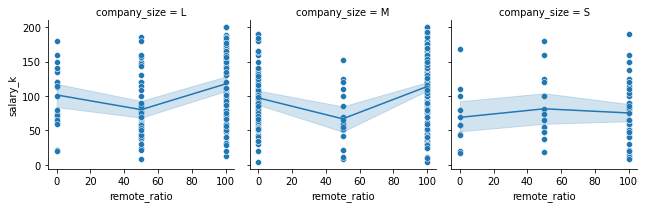

In [171]:
g = sns.FacetGrid(df, col="company_size")
g.map_dataframe(sns.scatterplot, x="remote_ratio", y="salary_k")
g.map_dataframe(sns.lineplot, x="remote_ratio", y="salary_k")
g.add_legend()
g.savefig('Salaries distribution per remote ratio.png')

In [16]:
df[['company_size', 'salary_k']].groupby(['company_size'], as_index=False).mean().sort_values(by='salary_k', ascending=True)

,company_size,salary_k
1,M,146.522500
2,S,377.710012
0,L,593.695818


In [17]:
df[['remote_ratio', 'salary_k']].groupby(['remote_ratio'], as_index=False).mean().sort_values(by='salary_k', ascending=True)

,remote_ratio,salary_k
0,0,218.147843
2,100,259.499903
1,50,708.018172


<AxesSubplot:>

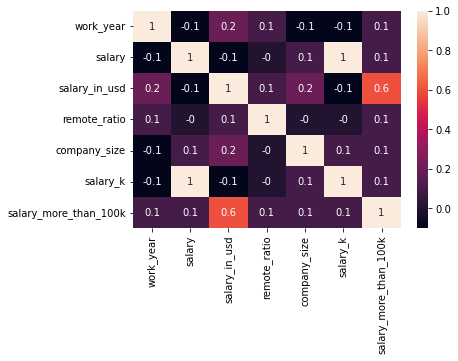

In [241]:
sns.heatmap(df.corr().round(1), annot=True)